# ST445 Managing and Visualizing Data

## Week 8 Assignment, MT 2017

### Milan Vojnovic and Christine Yuen
---

**Note: This assignment will be assessed. Deadline 5pm, 23 November 2017**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.datasets import make_biclusters
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score

### A. Exploratory data analysis (20 points)

In this exercise you need to visualize the popularity of different programming languages with respect to their usage by different GitHub repositories. You need to use the data retrieved from the GitHub archive provided in the following file: ```repos-per-lang.csv```. In particular, you need to:

1. Plot the empirical cumulative distribution function of the number of repositories per programming language. 
2. Plot the empirical complementary cumulative distribution function in different axis scales (linear or logarithmic). Discuss the shape of the distribution.   
3. Show a stem plot of the number of repositories per programming language in decreasing order. 
4. Generate a horizontal bar plot that shows the top 30 programming languages in decreasing order of popularity with the x axis showing the percentage of repositories.

       cnt        lang
0  1160725  JavaScript
1   871264         CSS
2   814370        HTML
3   671755       Shell
4   567150      Python


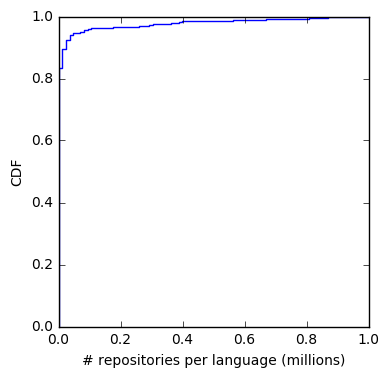

In [2]:
# A.1
import statsmodels.api as sm 

dfone = pd.read_csv('ReposPerLang.csv')
print(dfone.head())

fig, ax = plt.subplots(figsize=(4, 4))

dfone = dfone[dfone['cnt']>0]
n = dfone['cnt'].values

ecdf = sm.distributions.ECDF(n)
x = np.linspace(min(n), max(n), 100)
y = ecdf(x)
ax.step(x/1e6, y)
ax.set_xlabel('# repositories per language (millions)')
ax.set_ylabel('CDF')
ax.set_xlim([0,1])
plt.show()

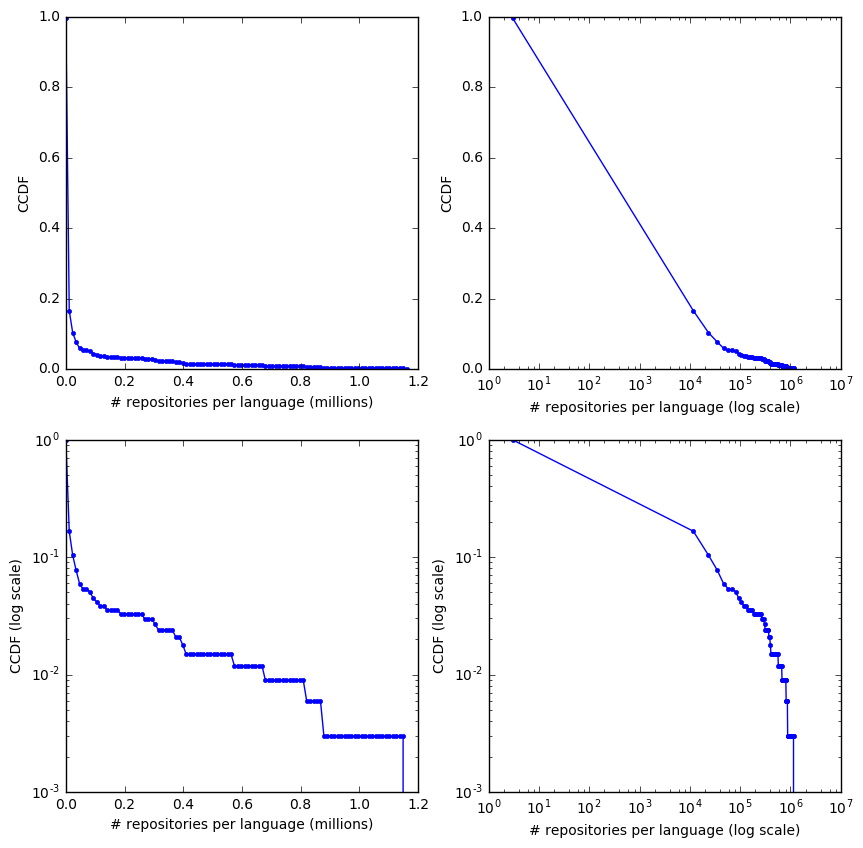

In [3]:
# A.2

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(10, 10))

ax[0,0].plot(x/1e6, 1-y, '.-')
ax[0,0].set_xlabel('# repositories per language (millions)')
ax[0,0].set_ylabel('CCDF')

ax[0,1].plot(x, 1-y, '.-')
ax[0,1].set_xlabel('# repositories per language (log scale)')
ax[0,1].set_ylabel('CCDF')
ax[0,1].set_xscale('log')

ax[1,0].plot(x/1e6, 1-y, '.-')
ax[1,0].set_xlabel('# repositories per language (millions)')
ax[1,0].set_ylabel('CCDF (log scale)')
ax[1,0].set_yscale('log')

ax[1,1].plot(x, 1-y, '.-')
ax[1,1].set_xlabel('# repositories per language (log scale)')
ax[1,1].set_ylabel('CCDF (log scale)')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2);

plt.show()

**Discussion**: From the last above plots, we observe that the CCDF (complementary cumulative distribution function) has a tail that decays fast (bounded by an exponentialy decaying function); see the plot with linear x axis and logarithmic y axis. We also observe that there is a body part of the CCDF where the decay seems slower than exponential as indicated in the plot with logarithmic x axis and logarithmic y axis. This part of the CCDF may be qualified to decay according to a power law (which is common in nature for many distributions), but it is not so clear in this particular case.

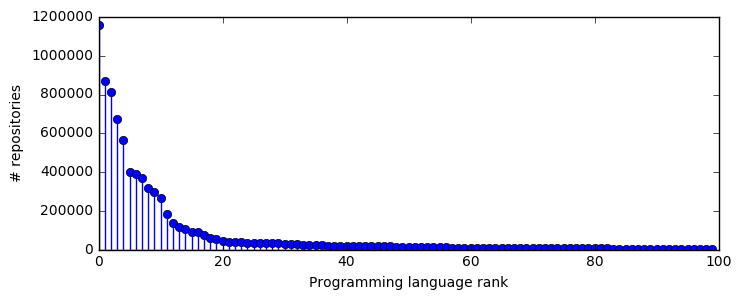

In [4]:
# A.3

fig, ax = plt.subplots(figsize=(8, 3))

ax.stem(dfone['cnt'].sort_values(ascending=False).head(100).values)

ax.set_xlabel('Programming language rank')
ax.set_ylabel('# repositories')

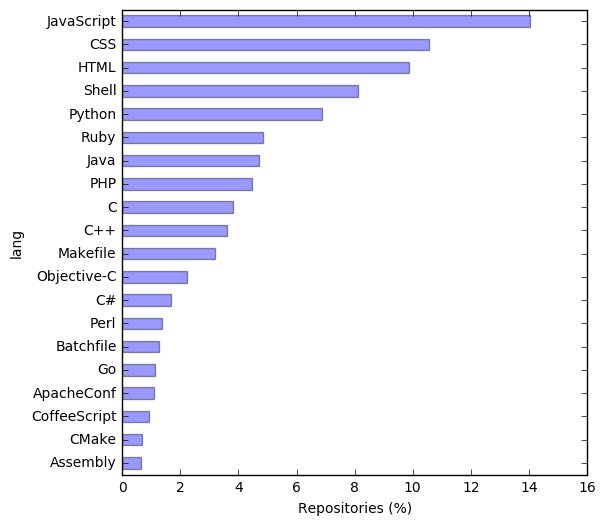

In [5]:
# A.4 

dfsmall = dfone[:30]

fig, ax = plt.subplots(figsize=(6,6))

tot = dfone['cnt'].sum()

dfp = pd.DataFrame(index=dfsmall['lang'], data=dfsmall['cnt'].values/tot*100, columns=['cnt'])
dfp.sort_values('cnt').tail(20).plot(kind='barh', ax=ax, color='b', alpha=0.4, legend='')

ax.set_xlabel('Repositories (%)')

### B. Matrix data visualization (40 points)

In this exercise you need to visualize co-usage of pairs of programming languages in GitHub repositories. You have two datasets for this analysis (a) ```repos-per-lang.csv``` that contains information about how many GitHub repositories use specific programming language and (b) ```lang-pairs-per-repo-top-1000.csv``` that contains information about how many times two programming languages are used in a common repository. In particular, you need to:

1. Plot a heatmap visualizing the co-usage counts of programming languages in GitHub repositories with the rows and the columns ordered according to: (a) random permutation, (b) decreasing order of programining language popularity and (c) a monotonic order of the Fiedler vector elements. 
2. Do the same but for the cosine similarity of pairs of programming languages with respect to their co-usage in GitHub repositories.

Note: the solution below only shows the solution for B.2, but you can easily get the solution  for B.1 by changing:
   ```
    dfs.set_value(row.lang1, row.lang2, row.cos_sim)
    dfs.set_value(row.lang2, row.lang1, row.cos_sim)
   ```
   to 
   ```
    dfs.set_value(row.lang1, row.lang2, row.pair_cnt)
    dfs.set_value(row.lang2, row.lang1, row.pair_cnt)
   ```   
   in code cell [7]

In [6]:
# load the data that contains the number of repositories per programming language
dfone = pd.read_csv('ReposPerLang.csv', index_col='lang')
print(dfone.head(5))

# load the data that contains the number of times specific pairs of programming languages are used in a repository 
dfpairs = pd.read_csv('LangPairsPerRepoTop1000.csv')
dfpairs = dfpairs.rename(columns={'lgn': 'lang1', 't2_lgn': 'lang2', 'cnt': 'pair_cnt'})
print(dfpairs.head(5))

df = dfpairs.set_index('lang1').join(dfone, how = 'left').reset_index()
df = df.rename(columns={'index': 'lang1', 'cnt': 'lang1_cnt'})
df = df.set_index('lang2').join(dfone, how = 'left').reset_index()
df = df.rename(columns={'index': 'lang2', 'cnt': 'lang2_cnt'})
df = df[['lang1','lang2','pair_cnt','lang1_cnt','lang2_cnt']]
df.head(5)

                cnt
lang               
JavaScript  1160725
CSS          871264
HTML         814370
Shell        671755
Python       567150
        lang1       lang2  pair_cnt
0  JavaScript         CSS    716441
1  JavaScript        HTML    602955
2        HTML         CSS    589971
3       Shell  JavaScript    221484
4       Shell      Python    217501


,lang1,lang2,pair_cnt,lang1_cnt,lang2_cnt
0,Assembly,ASP,13367,53347,37556
1,Awk,ASP,11052,24355,37556
2,Batchfile,ASP,4921,103957,37556
3,C,ASP,15086,315057,37556
4,C#,ASP,20132,138872,37556


In [7]:
# compute cosine simiarities
df['cos_sim'] = df['pair_cnt'] / np.sqrt(df['lang1_cnt']) / np.sqrt(df['lang2_cnt'])
print(df.head(5))

uniqlang = pd.concat([df['lang1'], df['lang2']]).unique()
dfs = pd.DataFrame(index=uniqlang, columns=uniqlang) # df fills with NAs
for row in df.itertuples():
    dfs.set_value(row.lang1, row.lang2, row.cos_sim)
    dfs.set_value(row.lang2, row.lang1, row.cos_sim)
dfs.fillna(0, inplace=True)
dfs.head(5)

       lang1 lang2  pair_cnt  lang1_cnt  lang2_cnt   cos_sim
0   Assembly   ASP     13367      53347      37556  0.298634
1        Awk   ASP     11052      24355      37556  0.365432
2  Batchfile   ASP      4921     103957      37556  0.078757
3          C   ASP     15086     315057      37556  0.138688
4         C#   ASP     20132     138872      37556  0.278766


,Assembly,Awk,Batchfile,C,C#,C++,CSS,Clojure,DOT,Erlang,...,Thrift,LiveScript,Vim script,ASP,ActionScript,ApacheConf,AppleScript,Arduino,Common Lisp,Racket
Assembly,0.000000,0.505336,0.140540,0.373880,0.054129,0.364834,0.046366,0.125083,0.201307,0.112013,...,0.0,0.0,0.0,0.298634,0.0,0.000000,0.000000,0.000000,0.0,0.0
Awk,0.505336,0.000000,0.064291,0.256094,0.000000,0.253319,0.029382,0.171320,0.292217,0.137941,...,0.0,0.0,0.0,0.365432,0.0,0.000000,0.000000,0.000000,0.0,0.0
Batchfile,0.140540,0.064291,0.000000,0.177222,0.173812,0.183005,0.156435,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.078757,0.0,0.101693,0.000000,0.000000,0.0,0.0
C,0.373880,0.256094,0.177222,0.000000,0.086843,0.644587,0.087264,0.056826,0.090814,0.077360,...,0.0,0.0,0.0,0.138688,0.0,0.024643,0.066905,0.094156,0.0,0.0
C#,0.054129,0.000000,0.173812,0.086843,0.000000,0.094864,0.088014,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.278766,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [8]:
# reorder rows and columns according to random permutation
cols = dfs.columns.tolist()
Rperm = np.random.permutation(len(cols))
cols = [cols[i] for i in Rperm]

dfs = dfs.reindex(cols)
dfs = dfs[cols]
dfs.head(5)

,Puppet,Makefile,D,Lua,AppleScript,Yacc,F#,QML,Processing,PostScript,...,Swift,Bison,M4,FORTRAN,Cucumber,LiveScript,Tcl,GDB,Smalltalk,DTrace
Puppet,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
Makefile,0.0,0.000000,0.05296,0.101498,0.0,0.22125,0.0,0.0,0.0,0.0,...,0.0,0.113915,0.236912,0.068102,0.0,0.0,0.108456,0.093612,0.0,0.0
D,0.0,0.052960,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
Lua,0.0,0.101498,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
AppleScript,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


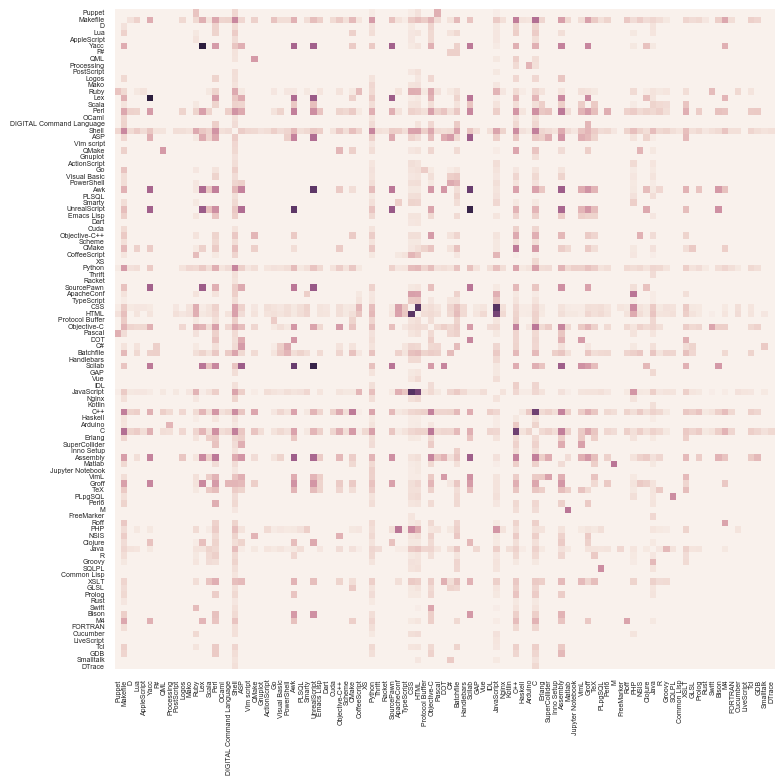

In [9]:
import seaborn as sns

plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

fig = plt.figure()

fig.set_figheight(8)
fig.set_figwidth(8)

sns.heatmap(dfs,linewidth=0,cbar=False)

plt.tight_layout()
plt.show()

In [10]:
# decreasing order of programming language popularity
uniqlang = pd.concat([dfpairs['lang1'], dfpairs['lang2']]).unique()
cnt = []
for lan in uniqlang:
    cnt.append(dfone.get_value(lan,'cnt'))
langdf= pd.DataFrame(data = np.transpose([uniqlang, cnt]), columns=['lang', 'cnt'])
langdf = langdf.sort_values('cnt', ascending=False)
langdf.head(5)

,lang,cnt
0,JavaScript,1160725
10,CSS,871264
1,HTML,814370
2,Shell,671755
6,Python,567150


In [11]:
dfs = dfs.reindex(langdf['lang'])
dfs = dfs[langdf['lang']]
dfs.head(5)

,JavaScript,CSS,HTML,Shell,Python,Ruby,Java,PHP,C,C++,...,Racket,Inno Setup,Thrift,FreeMarker,Gnuplot,DOT,GDB,LiveScript,DTrace,XS
lang,,,,,,,,,,,,,,,,,,,,,
JavaScript,0.000000,0.712428,0.620168,0.250826,0.163544,0.200016,0.115155,0.293289,0.086346,0.086104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040156,0.000000,0.0
CSS,0.712428,0.000000,0.700398,0.254260,0.169126,0.218898,0.131063,0.336747,0.087264,0.084946,...,0.000000,0.000000,0.000000,0.041793,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
HTML,0.620168,0.700398,0.000000,0.256662,0.187849,0.211643,0.143171,0.226208,0.101611,0.098907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Shell,0.250826,0.254260,0.256662,0.000000,0.352376,0.228917,0.170045,0.164822,0.370308,0.326087,...,0.048995,0.051018,0.058131,0.000000,0.054772,0.065224,0.066632,0.000000,0.056199,0.0
Python,0.163544,0.169126,0.187849,0.352376,0.000000,0.076206,0.090097,0.065259,0.263530,0.252377,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.067198,0.060995,0.000000,0.000000,0.0


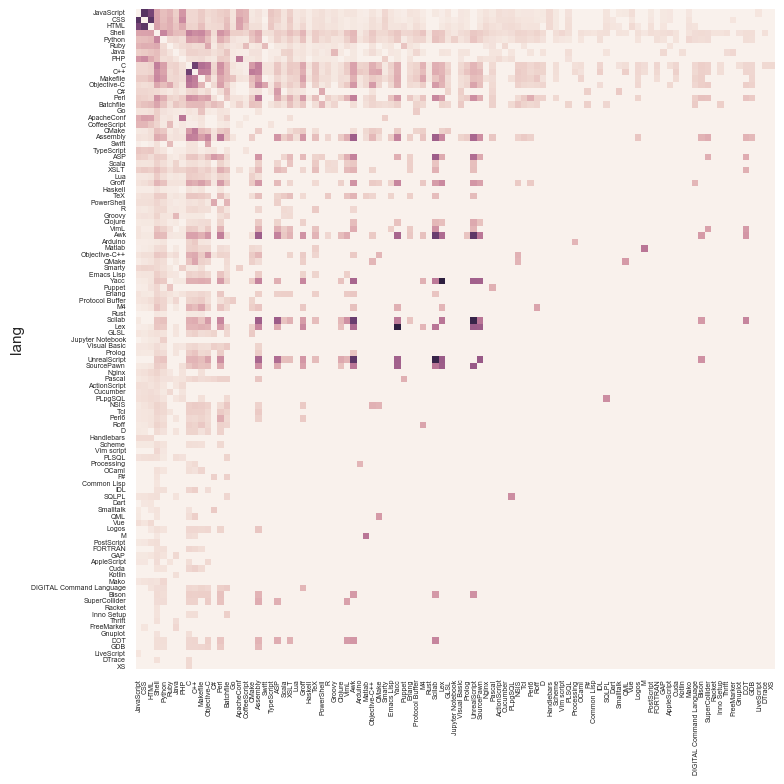

In [12]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

sns.heatmap(dfs,linewidth=0,cbar=False)

plt.tight_layout()
plt.show()

              LiveScript  JavaScript       Vue  Handlebars  CoffeeScript  \
lang                                                                       
LiveScript      0.000000    0.040156  0.000000    0.000000      0.000000   
JavaScript      0.040156    0.000000  0.064155    0.075937      0.189784   
Vue             0.000000    0.064155  0.000000    0.000000      0.000000   
Handlebars      0.000000    0.075937  0.000000    0.000000      0.000000   
CoffeeScript    0.000000    0.189784  0.000000    0.000000      0.000000   

              TypeScript  ApacheConf       CSS  ActionScript       PHP  \
lang                                                                     
LiveScript      0.000000    0.000000  0.000000      0.000000  0.000000   
JavaScript      0.142326    0.216272  0.712428      0.063064  0.293289   
Vue             0.000000    0.000000  0.040533      0.000000  0.000000   
Handlebars      0.000000    0.000000  0.076394      0.000000  0.000000   
CoffeeScript    0.04683

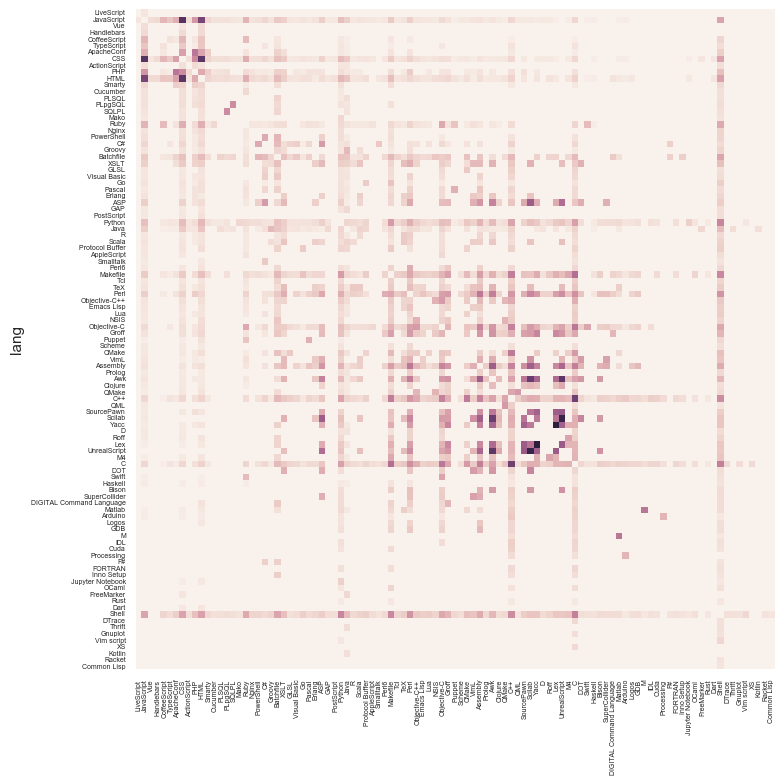

In [13]:
# Order in monotonic order of the Fiedler vector elements
A = dfs.as_matrix()

# compute the Laplacian matrix
L = np.diag(sum(A,1)) - A

# compute eigenvalues and eigenvectors of the Laplacian matrix
D, V =np.linalg.eigh(L)
argD = np.argsort(D)
D=D[argD]
V=V[:,argD]

# get the Fiedler eigenvector
fiedler=V[:,1]

# permutation in the order of Fiedler vector elements
Fperm=np.argsort(-fiedler)

# reorder the rows
Aperm2 = A[Fperm,:]
# reorder the columns
Aperm2 = Aperm2[:,Fperm]

cols = dfs.columns.tolist()
cols = [cols[i] for i in Fperm]

dfs = dfs.reindex(cols)
dfs = dfs[cols]
print(dfs.head(5))

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
sns.heatmap(dfs[cols],linewidth=0, cbar=False)
plt.tight_layout()
plt.show()

### C. Spectral co-clustering (40 points)

In this exercise you need to evaluate the robustness of the spectral co-clustering algorithm to random perturbation of a matrix with a bi-cluster structure. In particular, you need to:

1. Produce a visualization of five matrices, each with 300 rows and 300 columns and four bi-clusters, using the ```make_biclusters()``` function, for the following values of the standard deviation of noise: $\sigma$ = 0, 25, 50, 75, and 100. (This visualization may be similar to the one shown on slide 46 of the week 8 lecture.)

2. Perform the following steps:
  * Generate matrices with the same parameters as in the first question, but for 20 evenly spaced values of the standard deviation of noise in the interval [0,100] 
  * Randomly permute rows and columns of these matrices 
  * Apply the spectral co-clustering algorithm to each of these randomly permuted matrices and compute the corresponding consensus score 
  * Plot the consensus score versus the standard deviation of noise 
  * Discuss the results

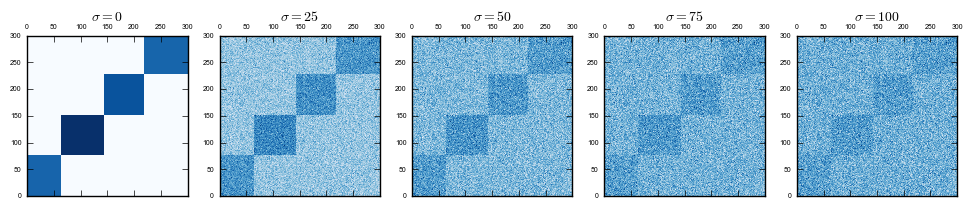

In [14]:
# C.1

sns.reset_orig()

nblocks = 4
nrows = 300

noisvar = [0, 25, 50, 75, 100]

plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(12,4))

for i in range(len(noisvar)):
    data, rows, columns = make_biclusters(shape=(nrows, nrows), n_clusters=nblocks, noise=noisvar[i], shuffle=False, random_state=0)
    ax[i].matshow(data, cmap=plt.cm.Blues)
    ax[i].set_xlim([0,300])
    ax[i].set_ylim([0,300])
    ax[i].set_title('$\sigma=%d$' % noisvar[i], fontsize=10)

plt.xticks(np.arange(0, nrows+1, 50));
plt.yticks(np.arange(0, nrows+1, 50));
plt.show()

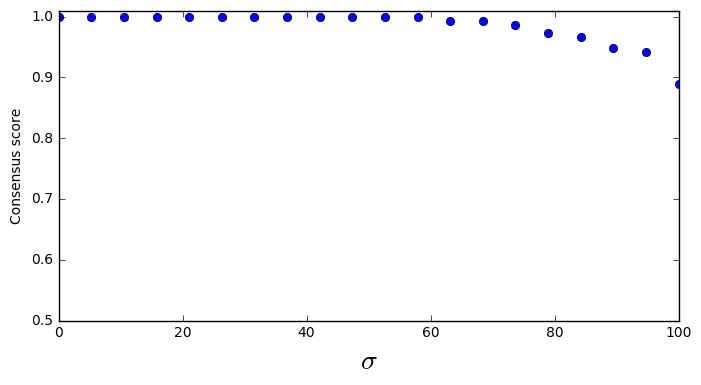

In [15]:
# C.2

sigma = np.linspace(0,100,20)

nblocks = 4
score = []

for s in sigma:
    
    # generate dataset
    data, rows, columns = make_biclusters(shape=(nrows, nrows), n_clusters=nblocks, noise=s, shuffle=False, random_state=0)

    # random reordering of rows and columns
    data, row_idx, col_idx = sg._shuffle(data, random_state=0)
    
    # fit spectral coclustering 
    model = SpectralCoclustering(n_clusters=nblocks, random_state=0, n_svd_vecs = 1)
    model.fit(data)
        
    fit_data = data[np.argsort(model.row_labels_)]
    fit_data = fit_data[:, np.argsort(model.column_labels_)]

    # compute consensus score
    score.append(consensus_score(model.biclusters_,(rows[:, row_idx], columns[:, col_idx])))

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
    
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(sigma, score, 'o')

ax.set_ylabel('Consensus score')
ax.set_xlabel('$\sigma$', fontsize=20)
ax.set_ylim([0.5, 1.01])
plt.show()

**Discussion**: From the last plot, we observe that the consensus score decreases with the variance of the noise, as expected. We also observe that this decrease is not so fast, indicating robustness of the co-clustering method to noise in data.